In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
%matplotlib inline

In [2]:
#concatenate list

A = [1,2,3,4,5,6]
B = [13, 21, 34]
print(A.append(B))
print(A)

None
[1, 2, 3, 4, 5, 6, [13, 21, 34]]


In [3]:
print(A.extend(B))
print(A)

None
[1, 2, 3, 4, 5, 6, [13, 21, 34], 13, 21, 34]


The answer to that question is "None of the above" because it is not possible to store the value into a third list. One of the existing list has to store the concatenated result.

In [4]:
#How to create an identity matrix in python
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
url="https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv"
fuel_data = pd.read_csv(url)
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1997_12_194_0_13,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [6]:
lowest_ave = fuel_data.groupby("fuel_type_code_pudl")["fuel_cost_per_unit_burned"].mean().sort_values()
lowest_ave

#gas is the fuel type with the lowest average fuel cost per unit burned

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

In [7]:
std_of_energy = fuel_data.std()
std_of_energy

utility_id_ferc1                7.417835e+01
report_year                     7.025483e+00
fuel_qty_burned                 9.118004e+06
fuel_mmbtu_per_unit             1.060022e+01
fuel_cost_per_unit_burned       2.854490e+03
fuel_cost_per_unit_delivered    6.877593e+04
fuel_cost_per_mmbtu             2.091541e+03
dtype: float64

In [8]:
#1.060022e+01 = 1.060022 · 10^+1 = 10 =  E stands for exponent of 10.

fuel_mmbtu_per_unit_std = 10.60022
print(round(fuel_mmbtu_per_unit_std, 2))

10.6


In [9]:
fuel_data['fuel_mmbtu_per_unit'].quantile([.25, .5, .75])
#std - 10.60, 75th percentile - 17.01

0.25     1.024000
0.50     5.762694
0.75    17.006000
Name: fuel_mmbtu_per_unit, dtype: float64

In [10]:
print(fuel_data["fuel_qty_burned"].skew())
print(fuel_data["fuel_qty_burned"].kurt())

15.851495469109503
651.3694501337732


In [11]:
missing = fuel_data.isnull().sum()
missing

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [12]:
n_of_rows = len(fuel_data)
pct = missing / n_of_rows
pct

record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.006097
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64

In [13]:
print(round(0.006097,3))

0.006


In [14]:
#fuel_unit - 180 missing rows - 0.006

In [15]:
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [16]:
fuel_data['fuel_unit'] = pd.Categorical(fuel_data['fuel_unit'])
fuel_data['fuel_unit']
#fuel_unit has a category data type and mode imputation

0        ton
1        ton
2        ton
3        ton
4        mcf
        ... 
29518    mcf
29519    mcf
29520    mcf
29521    ton
29522    mcf
Name: fuel_unit, Length: 29523, dtype: category
Categories (9, object): [bbl, gal, gramsU, kgU, ..., mmbtu, mwdth, mwhth, ton]

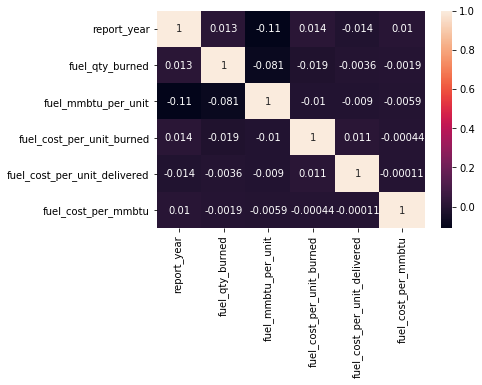

In [17]:
df_small = fuel_data.iloc[:,2:]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

#fuel_qty_burned and fuel_mmbtu_per_unit

In [18]:
coalfueldata = fuel_data.loc[fuel_data["fuel_type_code_pudl"]== "coal"]
grouped = coalfueldata.groupby('report_year')
coal_sum = grouped.sum()
print(coal_sum)

anserw = coal_sum.loc[[1994,1998],"fuel_cost_per_unit_burned"]
print(anserw.pct_change())

decimal = -0.205677 * 100
print(round(decimal))

             utility_id_ferc1  fuel_qty_burned  fuel_mmbtu_per_unit  \
report_year                                                           
1994                    50430     7.172082e+08         10293.429297   
1995                    51231     1.257398e+09         10262.019015   
1996                    45720     6.988514e+08          9269.878000   
1997                    44254     8.169024e+08          9000.095755   
1998                    46403     8.982095e+08          9212.781694   
1999                    45126     8.805301e+08          9052.256583   
2000                    44271     8.620492e+08          8584.171000   
2001                    40232     8.564316e+08          7574.081578   
2002                    38592     8.144357e+08          6967.923735   
2003                    38876     8.018815e+08          6906.303079   
2004                    38246     7.735318e+08          6677.321225   
2005                    37923     6.046304e+08          6712.699417   
2006  

In [19]:
highest_ave_year = fuel_data.groupby("report_year")["fuel_cost_per_unit_delivered"].mean().sort_values(ascending=False).head(1)
highest_ave_year

report_year
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64